# Retail Store Inventory Analysis & Modeling

This notebook walks through the complete process of data loading, exploration, wrangling, feature engineering, and model training using a real-world retail inventory dataset. We aim to predict **Units Sold** using historical and engineered features and a regression model for better forecasting and inventory optimization.

<br>

Dataset: [link](https://inventory-management-lcrh.onrender.com/inventory)

Power BI Dashboard: [link](https://app.powerbi.com/reportEmbed?reportId=fe21d222-3d98-4743-a765-9e30b437b01c&autoAuth=true&ctid=ddaefc43-6062-456e-b110-98a82695e5c3)


---


# Data Loading

We begin by importing necessary libraries and loading the dataset using pandas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


# Data Exploration


Explore data dimensions, types, missing values, distributions, and correlations to understand the structure and health of the dataset.

In [ ]:
# Examine the data's shape
print("Data Shape:", df.shape)

# Inspect data types
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Explore data distributions
print("\nDescriptive Statistics:\n", df.describe())

Data Shape: (73100, 15)

Data Types:
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

Missing Values:
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

Descriptive Statistics:
        Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count    

In [ ]:
df['Category']=df['Category'].astype('category')
print(df.dtypes)

Date                    object
Store ID                object
Product ID              object
Category              category
Region                  object
Inventory Level          int64
Units Sold               int64
Units Ordered            int64
Demand Forecast        float64
Price                  float64
Discount                 int64
Weather Condition       object
Holiday/Promotion        int64
Competitor Pricing     float64
Seasonality             object
dtype: object


In [ ]:
# Identify potential issues or patterns
print("\nPotential issues or patterns:")
print("Missing values:")
print(df.isnull().sum())
print("\nDuplicate rows:")
print(df.duplicated().sum())


Potential issues or patterns:
Missing values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

Duplicate rows:
0


In [ ]:
#identify numerical fields
print("Numerical fields are:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

#identify categorical fields
print("\nCategorical fields are:")
print(df.select_dtypes(include=['object', 'category']).columns.tolist())

Numerical fields are:
['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing']

Categorical fields are:
['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
display(df)

# Investigate the correlation between variables
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation matrix between numerical features:")
display(correlation_matrix)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring



Correlation matrix between numerical features:


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
Inventory Level,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.003411,0.009365
Units Sold,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,-0.000374,0.001259
Units Ordered,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,0.005446,0.004596
Demand Forecast,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,-0.000526,0.000844
Price,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,0.002309,0.993900
Discount,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.000852,0.001958
Holiday/Promotion,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,1.000000,0.001890
Competitor Pricing,0.009365,0.001259,0.004596,0.000844,0.993900,0.001958,0.001890,1.000000


#### ```Negative values``` in a correlation matrix indicate an inverse relationship between two variables. This means that as one variable increases, the other tends to decrease.

1. ```Discount' vs. 'Price'```: There's a strong negative correlation between 'Discount' and 'Price' (-0.980163). This is expected because higher discounts usually mean lower prices.
2. ```Units Sold' vs. 'Price' and 'Discount'```: 'Units Sold' has a negative correlation with 'Price' (-0.538957) and a positive correlation with 'Discount' (0.524698). This is also reasonable as higher prices generally lead to lower sales, while discounts can boost sales.
3. ```'Inventory Level' vs. 'Units Sold'```: The negative correlation between 'Inventory Level' and 'Units Sold' (-0.216577) might be due to the fact that as more units are sold, the inventory level decreases.

### Univariate Analysis

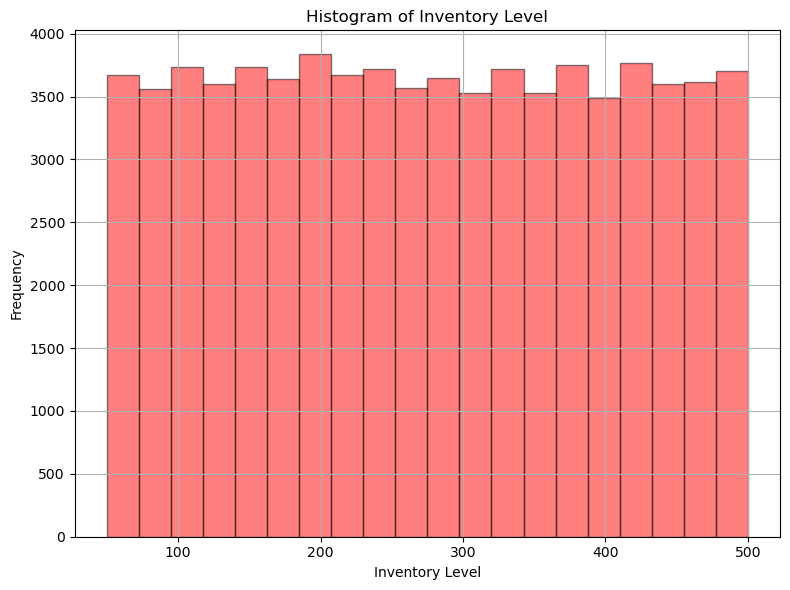

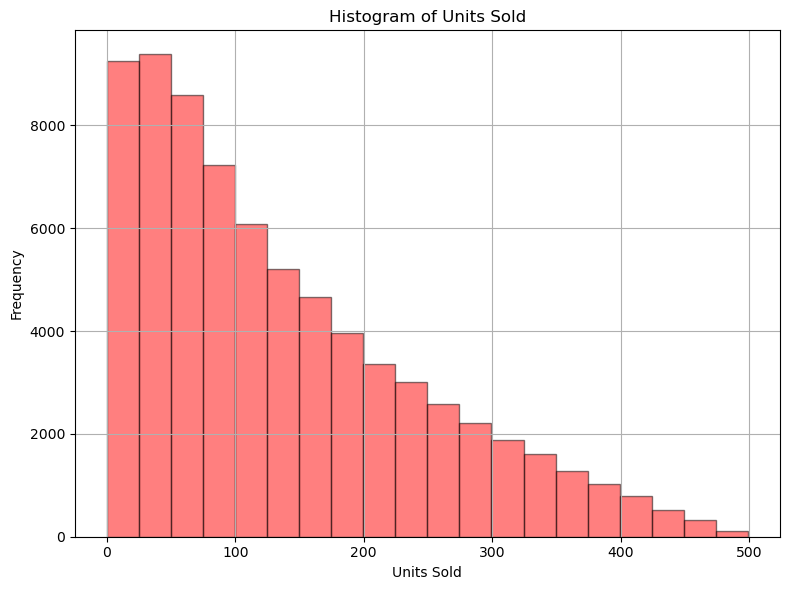

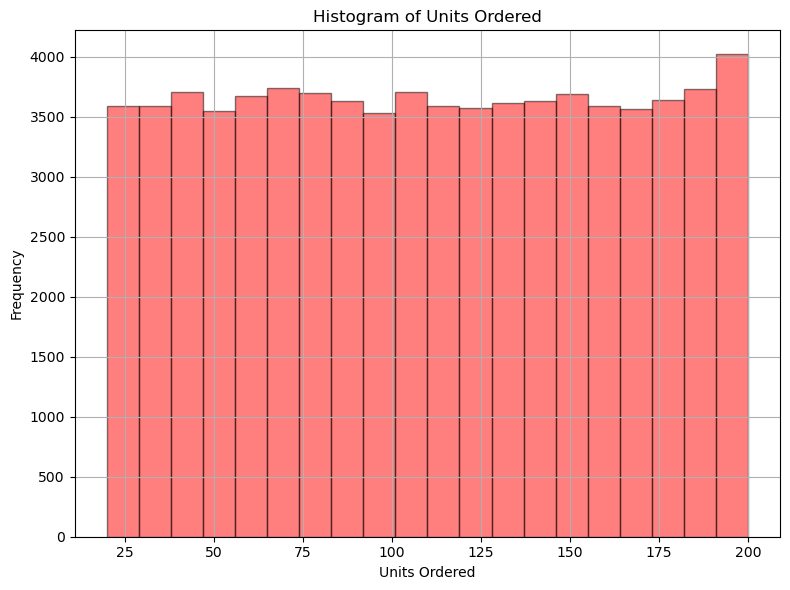

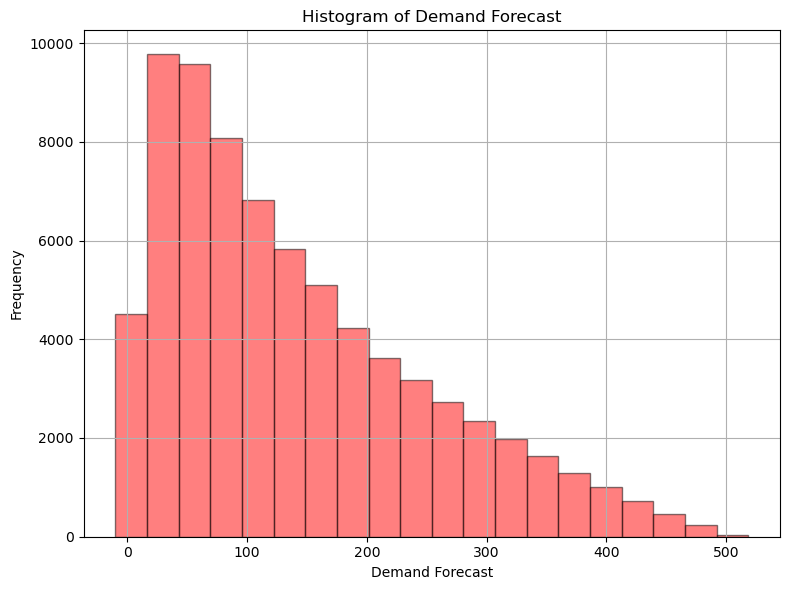

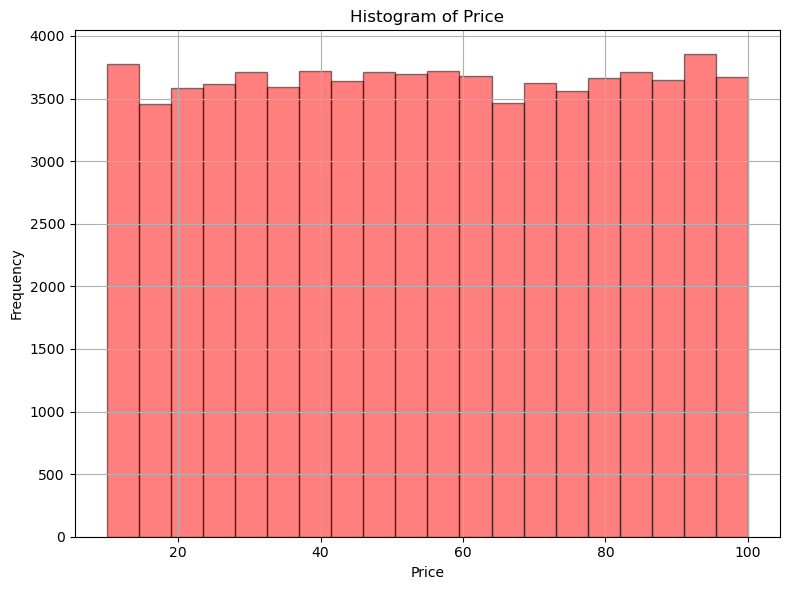

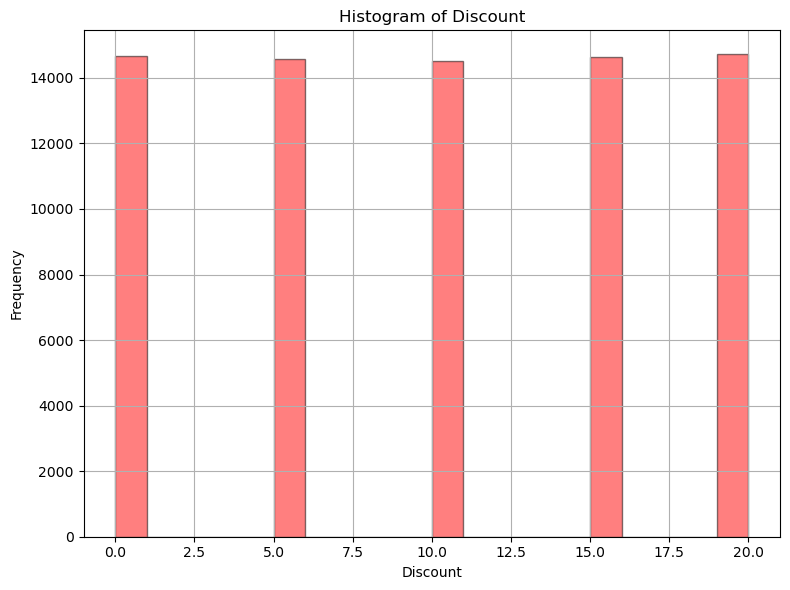

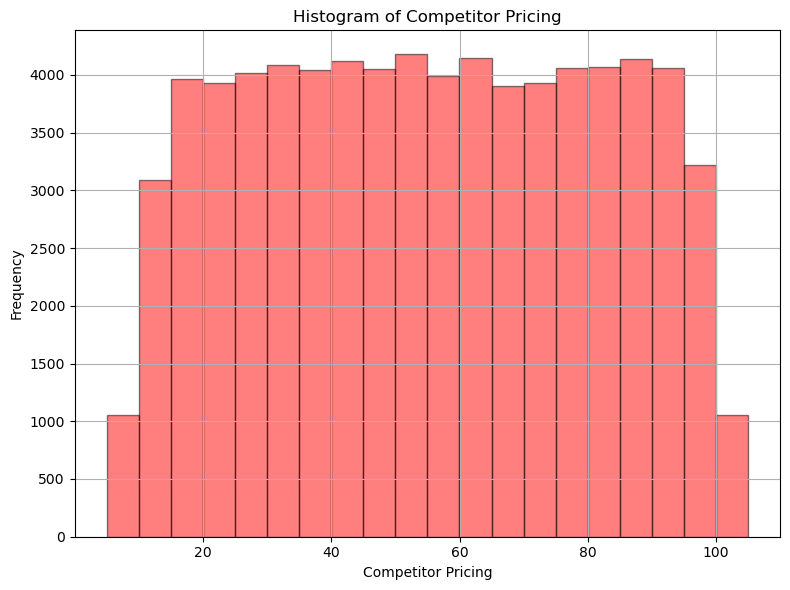

In [ ]:
# Create histograms for numerical features
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, ec='k', alpha=0.5, fc='r')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

### Bivariate Analysis

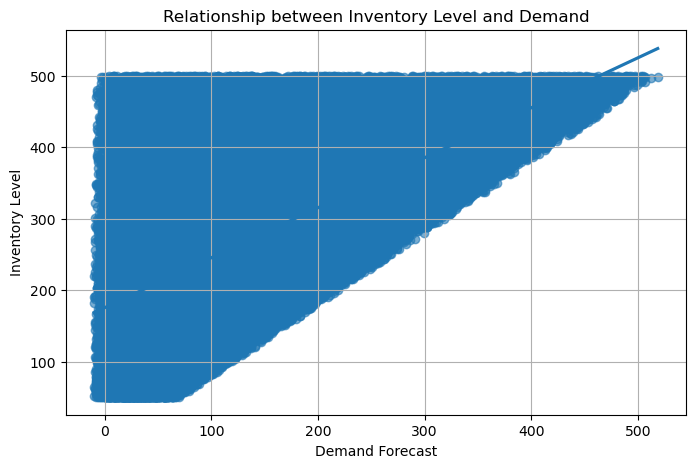

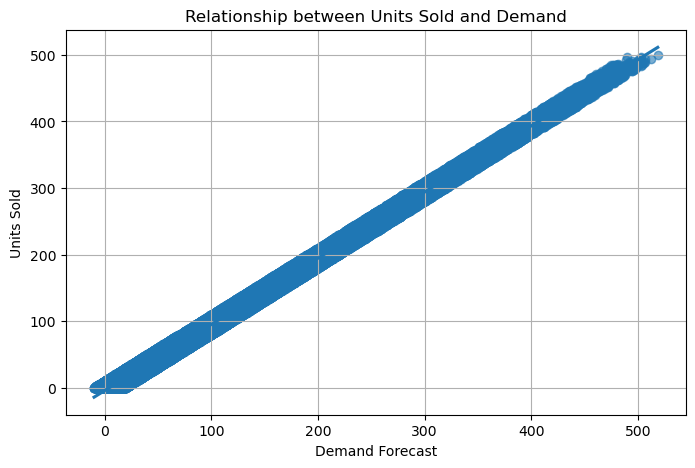

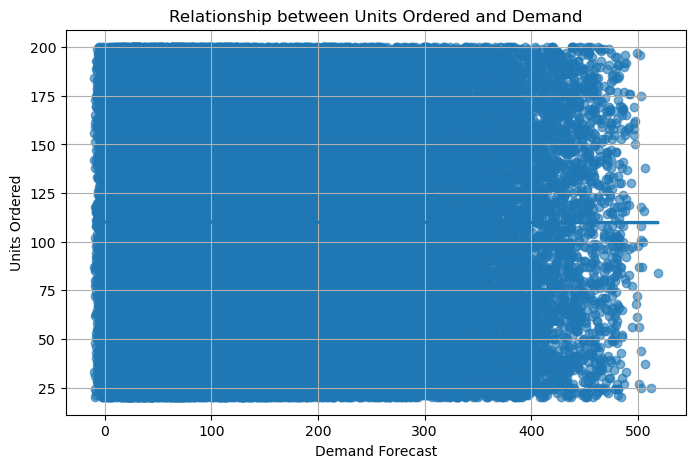

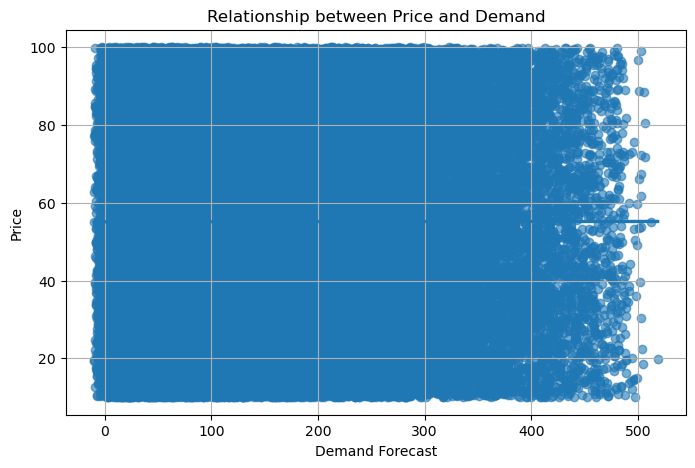

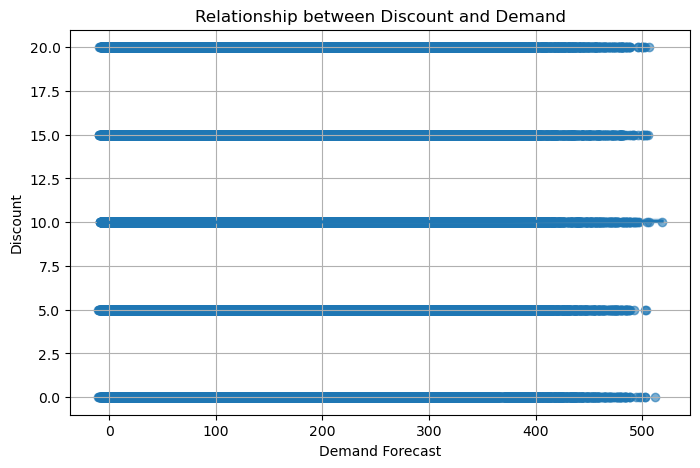

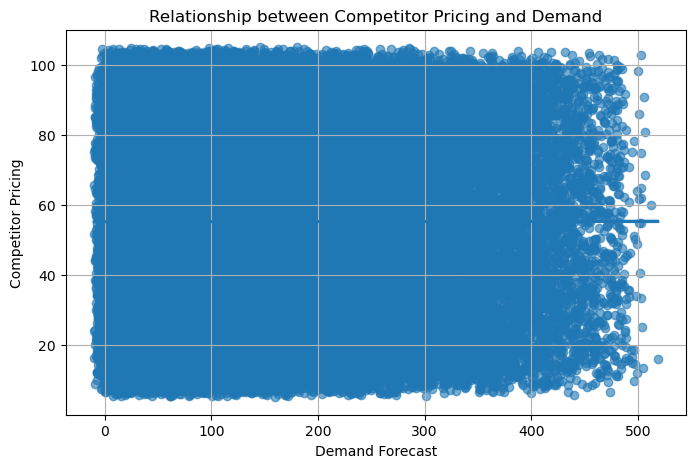

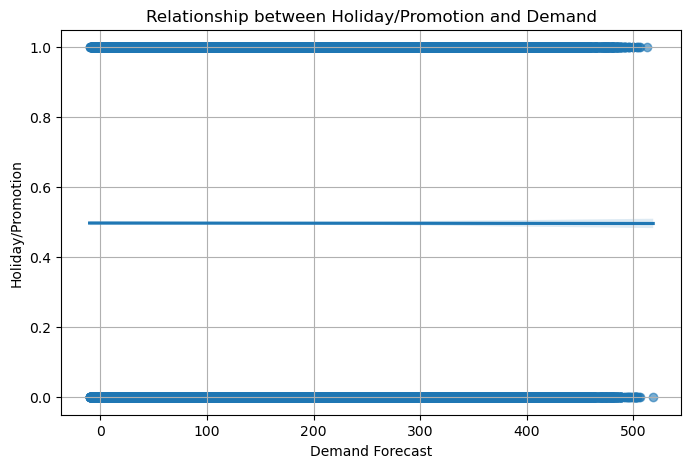

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Inventory Level','Units Sold','Units Ordered','Price','Discount','Competitor Pricing', 'Holiday/Promotion']

for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x='Demand Forecast', y=col, scatter_kws={'alpha': 0.6})
    plt.title(f'Relationship between {col} and Demand')
    plt.xlabel('Demand Forecast')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


### Multivariate Analysis

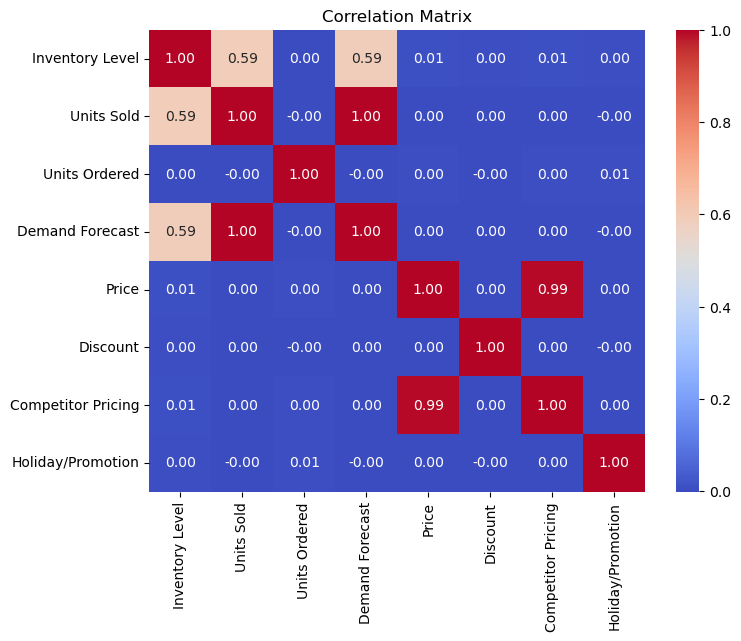

In [ ]:
# Correlation Analysis
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing', 'Holiday/Promotion']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Analyze unique values for categorical features
categorical_features = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
for features in categorical_features:
    print(f"\nUnique values for {features}:\n{df[features].unique()}")
    print(f"Number of unique values for {features}: {df[features].nunique()}")


Unique values for Store ID:
['S001' 'S002' 'S003' 'S004' 'S005']
Number of unique values for Store ID: 5

Unique values for Product ID:
['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020']
Number of unique values for Product ID: 20

Unique values for Category:
['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing']
Categories (5, object): ['Clothing', 'Electronics', 'Furniture', 'Groceries', 'Toys']
Number of unique values for Category: 5

Unique values for Region:
['North' 'South' 'West' 'East']
Number of unique values for Region: 4

Unique values for Weather Condition:
['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Number of unique values for Weather Condition: 4

Unique values for Seasonality:
['Autumn' 'Summer' 'Winter' 'Spring']
Number of unique values for Seasonality: 4


In [ ]:
# Define a function to identify outliers using IQR
def identify_outliers_iqr(data):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers


numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
for feature in numerical_features:
  outliers = identify_outliers_iqr(df[feature])
  df = df[~df[feature].isin(outliers)] # New change
  print(f"Outliers for {feature}: {outliers}")

Outliers for Inventory Level: []
Outliers for Units Sold: [464, 479, 437, 448, 476, 438, 454, 480, 450, 444, 448, 482, 455, 456, 441, 446, 460, 469, 471, 476, 455, 449, 482, 445, 446, 466, 440, 436, 466, 473, 440, 440, 476, 468, 459, 461, 478, 435, 484, 489, 438, 449, 484, 476, 435, 454, 460, 445, 440, 462, 462, 468, 446, 439, 455, 485, 440, 471, 449, 435, 468, 484, 440, 453, 446, 447, 468, 435, 471, 465, 453, 465, 471, 474, 442, 440, 444, 483, 481, 448, 441, 444, 453, 452, 459, 459, 476, 437, 435, 435, 456, 491, 444, 467, 477, 435, 464, 475, 444, 468, 439, 467, 448, 444, 438, 444, 476, 445, 459, 442, 456, 444, 444, 446, 435, 473, 491, 454, 471, 452, 461, 470, 474, 475, 449, 476, 467, 466, 466, 469, 436, 460, 447, 455, 455, 473, 471, 461, 438, 435, 440, 438, 485, 477, 437, 459, 448, 440, 468, 440, 444, 437, 446, 470, 456, 478, 478, 471, 448, 446, 450, 477, 454, 465, 444, 456, 489, 451, 449, 447, 448, 456, 438, 449, 442, 473, 467, 463, 438, 450, 450, 480, 450, 452, 496, 459, 456, 470, 4

In [ ]:
#Handling outliers
from scipy.stats.mstats import winsorize
df.loc[:, 'Demand Forecast'] = winsorize(df['Demand Forecast'], limits=[0.05, 0.05])

# Data Wrangling

We handle outliers, convert date fields, and derive new useful columns such as rolling averages, daily and weekly sales rates.

In [ ]:
# Calculate Daily Sales Rate
daily_sales = df.groupby(['Product ID', 'Store ID', 'Date'])['Units Sold'].sum().reset_index()
daily_sales_rate = daily_sales.groupby(['Product ID', 'Store ID'])['Units Sold'].mean().reset_index()
daily_sales_rate = daily_sales_rate.rename(columns={'Units Sold': 'Daily Sales Rate'})
print("Daily Sales Rate:\n")
display(daily_sales_rate)

# Calculate Average Sales per Week
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sales = df.groupby(['Product ID', 'Store ID', 'Week'])['Units Sold'].sum().reset_index()
average_weekly_sales = weekly_sales.groupby(['Product ID', 'Store ID'])['Units Sold'].mean().reset_index()
average_weekly_sales = average_weekly_sales.rename(columns={'Units Sold': 'Average Weekly Sales'})
print("\nAverage Weekly Sales:\n")
display(average_weekly_sales)

# Calculate 7-day rolling average sales
daily_sales['Rolling_Avg_Sales'] = daily_sales.groupby('Product ID')['Units Sold'].rolling(window=7, min_periods=1).mean().reset_index(0,drop=True)
print("\nRolling Average Sales\n")
display(daily_sales['Rolling_Avg_Sales'])

Daily Sales Rate:



,Product ID,Store ID,Daily Sales Rate
0,P0001,S001,134.761379
1,P0001,S002,140.821082
2,P0001,S003,125.918396
3,P0001,S004,134.541551
4,P0001,S005,125.310585
...,...,...,...
95,P0020,S001,133.618056
96,P0020,S002,138.480501
97,P0020,S003,132.490960
98,P0020,S004,132.376210



Average Weekly Sales:



,Product ID,Store ID,Average Weekly Sales
0,P0001,S001,1878.884615
1,P0001,S002,1952.538462
2,P0001,S003,1750.750000
3,P0001,S004,1868.057692
4,P0001,S005,1730.250000
...,...,...,...
95,P0020,S001,1850.096154
96,P0020,S002,1912.096154
97,P0020,S003,1831.942308
98,P0020,S004,1840.538462



Rolling Average Sales



0        127.000000
1        104.000000
2         71.000000
3         67.750000
4         83.600000
            ...    
72139    118.857143
72140    124.571429
72141    114.428571
72142    119.285714
72143    115.714286
Name: Rolling_Avg_Sales, Length: 72144, dtype: float64

In [ ]:
# Find the last restock date for each product
df['Max_Inventory'] = df.groupby(['Product ID', 'Store ID'])['Inventory Level'].transform('max')
last_restock_date = df[df['Inventory Level'] == df['Max_Inventory']].groupby(['Product ID', 'Store ID'])['Date'].min().reset_index()
last_restock_date = last_restock_date.rename(columns={'Date': 'Last_Restock_Date'})
# Merge last restock date with daily sales
daily_sales = pd.merge(daily_sales, last_restock_date, on=['Product ID', 'Store ID'], how='left')

display(daily_sales.head())

,Product ID,Store ID,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date
0,P0001,S001,2022-01-01,127,127.00,2022-11-30
1,P0001,S001,2022-01-02,81,104.00,2022-11-30
2,P0001,S001,2022-01-03,5,71.00,2022-11-30
3,P0001,S001,2022-01-04,58,67.75,2022-11-30
4,P0001,S001,2022-01-05,147,83.60,2022-11-30


In [ ]:
# Calculate days since last restock
daily_sales['Days_Since_Last_Restock'] = ( daily_sales['Last_Restock_Date'] - daily_sales['Date']).dt.days

# Handle missing values in Days_Since_Last_Restock
daily_sales['Days_Since_Last_Restock'] = daily_sales['Days_Since_Last_Restock'].fillna(0).astype(int)
display(daily_sales.head())

,Product ID,Store ID,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock
0,P0001,S001,2022-01-01,127,127.00,2022-11-30,333
1,P0001,S001,2022-01-02,81,104.00,2022-11-30,332
2,P0001,S001,2022-01-03,5,71.00,2022-11-30,331
3,P0001,S001,2022-01-04,58,67.75,2022-11-30,330
4,P0001,S001,2022-01-05,147,83.60,2022-11-30,329


In [ ]:
daily_sales_rate = pd.merge(daily_sales[['Product ID', 'Store ID']].drop_duplicates(), daily_sales, on=['Product ID', 'Store ID'], how='left')
display(daily_sales_rate.head())

,Product ID,Store ID,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock
0,P0001,S001,2022-01-01,127,127.00,2022-11-30,333
1,P0001,S001,2022-01-02,81,104.00,2022-11-30,332
2,P0001,S001,2022-01-03,5,71.00,2022-11-30,331
3,P0001,S001,2022-01-04,58,67.75,2022-11-30,330
4,P0001,S001,2022-01-05,147,83.60,2022-11-30,329


In [ ]:
# Calculate Days of Inventory Remaining
inventory_remaining = pd.merge(df[['Product ID', 'Store ID', 'Inventory Level']].drop_duplicates(), daily_sales_rate, on=['Product ID', 'Store ID'], how='left')
inventory_remaining['Days of Inventory Remaining'] = inventory_remaining['Inventory Level'] / inventory_remaining['Rolling_Avg_Sales']
inventory_remaining['Days of Inventory Remaining'] = inventory_remaining['Days of Inventory Remaining'].fillna(999999)  # Handle cases where daily sales rate is 0
display(inventory_remaining.head())

,Product ID,Store ID,Inventory Level,Date,Units Sold,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock,Days of Inventory Remaining
0,P0001,S001,231,2022-01-01,127,127.00,2022-11-30,333,1.818898
1,P0001,S001,231,2022-01-02,81,104.00,2022-11-30,332,2.221154
2,P0001,S001,231,2022-01-03,5,71.00,2022-11-30,331,3.253521
3,P0001,S001,231,2022-01-04,58,67.75,2022-11-30,330,3.409594
4,P0001,S001,231,2022-01-05,147,83.60,2022-11-30,329,2.763158


In [ ]:
print(df.columns)
print(average_weekly_sales.columns)
print(inventory_remaining.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Week', 'Max_Inventory'],
      dtype='object')
Index(['Product ID', 'Store ID', 'Average Weekly Sales'], dtype='object')
Index(['Product ID', 'Store ID', 'Inventory Level', 'Date', 'Units Sold',
       'Rolling_Avg_Sales', 'Last_Restock_Date', 'Days_Since_Last_Restock',
       'Days of Inventory Remaining'],
      dtype='object')


In [ ]:
# Set index for faster joins and avoid duplicates
df.set_index(['Product ID', 'Store ID'], inplace=True)

# Ensure other DataFrames also have unique keys
daily_sales_rate = daily_sales_rate[~daily_sales_rate.duplicated(['Product ID', 'Store ID'])]
average_weekly_sales = average_weekly_sales[~average_weekly_sales.duplicated(['Product ID', 'Store ID'])]
inventory_remaining = inventory_remaining[~inventory_remaining.duplicated(['Product ID', 'Store ID'])]

# Set index for merging
daily_sales_rate.set_index(['Product ID', 'Store ID'], inplace=True)
average_weekly_sales.set_index(['Product ID', 'Store ID'], inplace=True)
inventory_remaining.set_index(['Product ID', 'Store ID'], inplace=True)

# Merge the DataFrames using 'inner' to avoid duplicates
df = df.join(daily_sales_rate, how='inner', rsuffix='_daily')
df = df.join(average_weekly_sales, how='inner', rsuffix='_weekly')

# Merge days of inventory remaining, taking care of unique values
df = df.join(inventory_remaining[['Days of Inventory Remaining']], how='inner', rsuffix='_inventory')

# Reset index if needed
df.reset_index(inplace=True)

In [ ]:
df.shape

(72144, 24)

In [ ]:
display(df)

,Product ID,Store ID,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Seasonality,Week,Max_Inventory,Date_daily,Units Sold_daily,Rolling_Avg_Sales,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining
0,P0001,S001,2022-01-01,Groceries,North,231,127,55,135.47,33.50,...,Autumn,52,500,2022-01-01,127,127.000000,2022-11-30,333,1878.884615,1.818898
1,P0002,S001,2022-01-01,Toys,South,204,150,66,144.04,63.01,...,Autumn,52,500,2022-01-01,150,150.000000,2023-02-21,416,1799.634615,1.360000
2,P0003,S001,2022-01-01,Toys,West,102,65,51,74.02,27.99,...,Summer,52,500,2022-01-01,65,65.000000,2023-12-16,714,1900.942308,1.569231
3,P0004,S001,2022-01-01,Toys,North,469,61,164,62.18,32.72,...,Autumn,52,500,2022-01-01,61,61.000000,2022-08-23,234,1860.442308,7.688525
4,P0005,S001,2022-01-01,Electronics,East,166,14,135,13.68,73.64,...,Summer,52,500,2022-01-01,14,14.000000,2023-04-29,483,1808.961538,11.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72139,P0016,S005,2024-01-01,Furniture,East,96,8,127,18.46,73.73,...,Winter,1,500,2022-01-01,11,116.857143,2022-05-09,128,1846.403846,0.607579
72140,P0017,S005,2024-01-01,Toys,North,313,51,101,48.43,82.57,...,Autumn,1,500,2022-01-01,371,176.571429,2023-01-29,393,1878.596154,2.197411
72141,P0018,S005,2024-01-01,Clothing,West,278,36,151,39.65,11.11,...,Winter,1,500,2022-01-01,107,88.714286,2022-12-12,345,1798.730769,1.814815
72142,P0019,S005,2024-01-01,Toys,East,374,264,21,270.52,53.14,...,Spring,1,500,2022-01-01,106,94.428571,2023-01-03,367,1820.076923,2.488654


# Feature Engineering

We engineer new features such as lag values, date parts, and encoded variables to strengthen model performance.

In [ ]:
# Date/Time Features
df['Day of Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week Number'] = df['Date'].dt.isocalendar().week

# Sort by Store ID, Product ID, and Date for proper time series grouping
df.sort_values(['Store ID', 'Product ID', 'Date'], inplace=True)

# Lag feature (previous day sales)
df['Lag_1_Sales'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(1)

In [ ]:
# Rolling average (7-day)
rolling_sales = (
    df.groupby(['Store ID', 'Product ID'])['Units Sold'].rolling(window=7).mean().reset_index(level=[0, 1], drop=True)  # Reset index to align with original data
)
df['Rolling_7d_Sales'] = rolling_sales

display(df.sample(n=5))

,Product ID,Store ID,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining,Day of Week,Month,Year,Week Number,Lag_1_Sales,Rolling_7d_Sales
2847,P0006,S005,2022-01-29,Clothing,West,391,47,111,47.29,12.36,...,2023-04-08,462,1824.442308,1.014096,5,1,2022,4,170.0,91.571429
28034,P0001,S002,2022-10-12,Furniture,North,315,81,122,79.17,39.26,...,2023-10-14,651,1952.538462,3.805071,2,10,2022,41,236.0,119.571429
43638,P0011,S002,2023-03-19,Groceries,West,243,52,142,47.93,76.14,...,2022-01-24,23,1796.403846,0.563702,6,3,2023,11,337.0,181.285714
52377,P0020,S005,2023-06-15,Electronics,West,412,137,180,137.94,20.73,...,2023-08-14,590,1819.692308,0.859091,3,6,2023,24,389.0,105.142857
61529,P0005,S004,2023-09-16,Electronics,North,259,182,55,196.40,56.29,...,2022-06-05,155,1860.134615,2.367121,5,9,2023,37,111.0,98.000000


In [ ]:
df.shape

(72144, 30)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_features = ['Category', 'Region', 'Weather Condition', 'Seasonality']
numerical_features = ['Inventory Level', 'Units Ordered', 'Units Sold', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing',  'Holiday/Promotion',
'Lag_1_Sales', 'Rolling_7d_Sales']

le = LabelEncoder()
for Category in categorical_features:
    df[Category] = le.fit_transform(df[Category].astype(str))

# 6. Scaling Numerical Features
scaler = StandardScaler()
for feature in numerical_features:
    df[feature] = scaler.fit_transform(df[[feature]])
display(df.sample(n=5))


,Product ID,Store ID,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining,Day of Week,Month,Year,Week Number,Lag_1_Sales,Rolling_7d_Sales
12797,P0003,S005,2022-05-10,4,0,0.156784,0.373824,0.554931,0.405863,0.354233,...,2022-04-14,103,1970.576923,3.203814,1,5,2022,19,-0.998707,1.199312
69682,P0016,S001,2023-12-08,1,0,0.071326,-0.805358,-0.019016,-0.806962,-0.476086,...,2023-04-20,474,1782.846154,1.423529,4,12,2023,49,-0.196487,-0.419741
48832,P0012,S005,2023-05-10,2,0,-1.210542,-1.037328,0.535800,-1.201983,0.975148,...,2023-01-16,380,1840.557692,1.955530,2,5,2023,19,0.141798,0.501761
65471,P0016,S003,2023-10-26,4,0,-0.363732,0.499474,1.588036,0.511558,0.278156,...,2022-02-18,48,1905.384615,2.959201,3,10,2023,43,-0.892389,-0.669391
72134,P0011,S005,2024-01-01,3,1,-0.899786,-0.109447,0.880168,0.011952,1.188779,...,2022-04-18,107,1835.288462,2.759926,0,1,2024,1,-1.153352,-0.783202


# Data Splitting

We divide the dataset into train, validation, and test sets using a 60-20-20 split.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['Units Sold', 'Date'], axis=1)
y = df['Units Sold']

# Split the data into training and validation/testing sets (60/40 split)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4)

# Further split the validation/testing set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43286, 28)
y_train shape: (43286,)
X_val shape: (14429, 28)
y_val shape: (14429,)
X_test shape: (14429, 28)
y_test shape: (14429,)


In [ ]:
df.columns

Index(['Product ID', 'Store ID', 'Date', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Week', 'Max_Inventory',
       'Date_daily', 'Units Sold_daily', 'Rolling_Avg_Sales',
       'Last_Restock_Date', 'Days_Since_Last_Restock', 'Average Weekly Sales',
       'Days of Inventory Remaining', 'Day of Week', 'Month', 'Year',
       'Week Number', 'Lag_1_Sales', 'Rolling_7d_Sales'],
      dtype='object')

In [ ]:
X_val.head()

,Product ID,Store ID,Category,Region,Inventory Level,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,...,Last_Restock_Date,Days_Since_Last_Restock,Average Weekly Sales,Days of Inventory Remaining,Day of Week,Month,Year,Week Number,Lag_1_Sales,Rolling_7d_Sales
25799,P0002,S004,0,1,-0.915324,-0.650357,-0.847847,1.291753,1.410675,0,...,2022-05-29,148,1748.769231,1.950543,0,9,2022,38,-1.047034,-0.489496
53645,P0005,S005,4,1,-0.985244,0.019247,-0.602233,0.314273,1.410675,2,...,2022-10-08,280,1916.769231,1.372549,2,6,2023,26,-0.167491,0.648614
34086,P0003,S004,2,2,-0.254968,0.459273,-0.871066,0.867948,-0.706746,3,...,2022-10-10,282,1756.173077,2.923221,0,12,2022,50,-0.409124,-0.904356
62841,P0011,S005,0,0,1.337657,1.396720,1.713379,-0.516814,1.410675,2,...,2022-04-18,107,1835.288462,2.759926,4,9,2023,39,-0.505777,0.953334
62349,P0014,S005,1,3,-0.938631,0.401879,-1.207333,0.554417,0.704868,3,...,2022-08-08,219,1862.596154,2.250247,6,9,2023,38,-0.090169,0.277810


In [ ]:
# Feature Perturbation for Key Features
def apply_feature_perturbation(df, level=0.05):
    """Apply controlled perturbation to key features to improve model robustness."""
    np.random.seed(42)
    key_features = ['Demand Forecast', 'Inventory Level', 'Rolling_7d_Sales',
                    'Lag_1_Sales', 'Days_Since_Last_Restock', 'Days of Inventory Remaining']

    for feature in key_features:
        if feature in df.columns:
            perturbation = np.random.normal(loc=0.0, scale=level * df[feature].std(), size=len(df))
            df[feature] += perturbation
    return df

# Apply feature perturbation to train, validation, and test sets
X_train_perturbed = apply_feature_perturbation(X_train.copy(), level=0.05)
X_val_perturbed = apply_feature_perturbation(X_val.copy(), level=0.05)
X_test_perturbed = apply_feature_perturbation(X_test.copy(), level=0.05)

# Target Perturbation
def apply_target_perturbation(series, level=0.01):
    """Apply small perturbation to target values to smooth optimization."""
    perturbation = np.random.normal(loc=0.0, scale=level * series.std(), size=len(series))
    return series + perturbation

# Apply target perturbation
y_train_perturbed = apply_target_perturbation(y_train, level=0.01)
y_val_perturbed = apply_target_perturbation(y_val, level=0.01)
y_test_perturbed = apply_target_perturbation(y_test, level=0.01)

In [ ]:
X_train.dtypes

Product ID                             object
Store ID                               object
Category                                int32
Region                                  int32
Inventory Level                       float64
Units Ordered                         float64
Demand Forecast                       float64
Price                                 float64
Discount                              float64
Weather Condition                       int32
Holiday/Promotion                     float64
Competitor Pricing                    float64
Seasonality                             int32
Week                                   UInt32
Max_Inventory                           int64
Date_daily                     datetime64[ns]
Units Sold_daily                        int64
Rolling_Avg_Sales                     float64
Last_Restock_Date              datetime64[ns]
Days_Since_Last_Restock               float64
Average Weekly Sales                  float64
Days of Inventory Remaining       


🔹 Model Performance:
Train RMSE: 0.2166
Test RMSE: 0.2135
Cross-Validation RMSE: 0.2167
Train MAE: 0.1692
Test MAE: 0.1676
R² Score: 0.9532


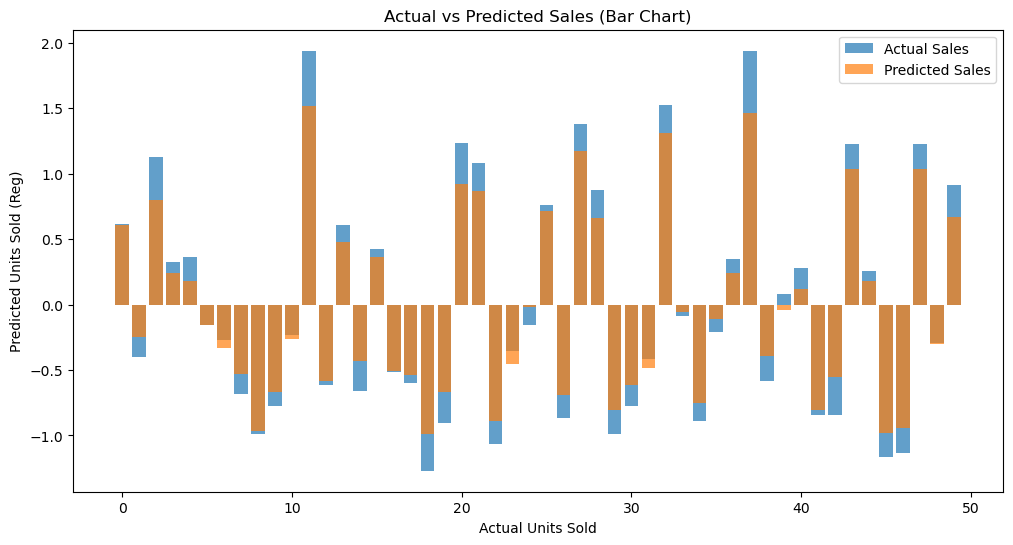

<Figure size 800x600 with 0 Axes>

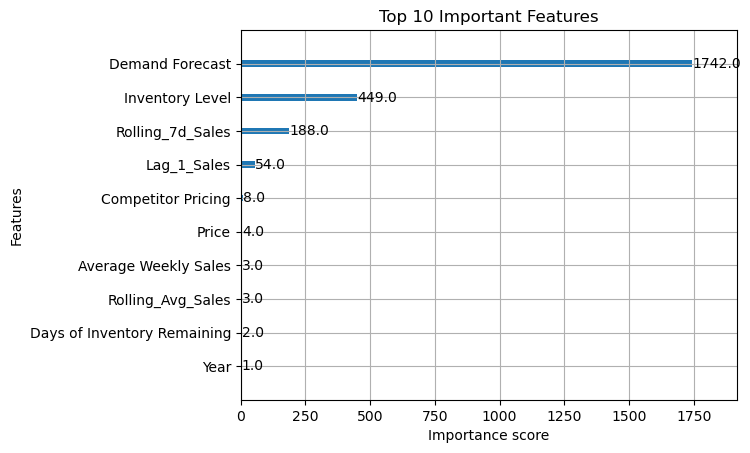

In [ ]:
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False, random_state=42)

# Convert categorical columns to 'category' and then to category codes
X_train['Product ID'] = X_train['Product ID'].astype('category').cat.codes
X_train['Store ID'] = X_train['Store ID'].astype('category').cat.codes

X_val['Product ID'] = X_val['Product ID'].astype('category').cat.codes
X_val['Store ID'] = X_val['Store ID'].astype('category').cat.codes

X_test['Product ID'] = X_test['Product ID'].astype('category').cat.codes
X_test['Store ID'] = X_test['Store ID'].astype('category').cat.codes

# Convert datetime columns to int (days since epoch)
X_train['Date_daily'] = (X_train['Date_daily'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_train['Last_Restock_Date'] = (X_train['Last_Restock_Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

X_val['Date_daily'] = (X_val['Date_daily'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_val['Last_Restock_Date'] = (X_val['Last_Restock_Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

X_test['Date_daily'] = (X_test['Date_daily'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_test['Last_Restock_Date'] = (X_test['Last_Restock_Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Convert data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Updated XGBoost Parameters (Adjusted for Generalization)
params_reg = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,                 # Learning rate
    'max_depth': 4,                        # Tree depth
    'subsample': 0.8,                      # Sample usage
    'colsample_bytree': 0.8,               # Feature sampling
    'random_state': 42,
    'n_jobs': -1,
    'reg_lambda': 11,                      # L2 regularization
    'reg_alpha': 11,                       # L1 regularization
    'max_leaves': 20,                      # Cap leaf nodes
    'min_child_weight': 10,                # Weight per leaf
    'gamma': 0.5                           # Regularization on leaf split
}

# Cross-validation
cv_results = xgb.cv(
    params_reg,
    dtrain,
    num_boost_round=200,  # Balanced boosting rounds
    nfold=5,
    metrics='rmse',
    early_stopping_rounds=20,
    as_pandas=True,
    seed=42
)

# Best iteration and RMSE
best_iteration = cv_results['test-rmse-mean'].idxmin()
cv_rmse = cv_results.loc[best_iteration, 'test-rmse-mean']

# Train final model
xgb_model = xgb.train(params_reg, dtrain, num_boost_round=best_iteration)

# Predictions
y_train_pred = xgb_model.predict(dtrain)
y_test_pred = xgb_model.predict(dtest)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Display results
print("\n Model Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Cross-Validation RMSE: {cv_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted Sales using a Bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(y_test[:50])), y_test[:50], label='Actual Sales', alpha=0.7)
plt.bar(range(len(y_test_pred[:50])), y_test_pred[:50], label='Predicted Sales', alpha=0.7)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold (Reg)')
plt.title('Actual vs Predicted Sales (Bar Chart)')
plt.legend()
plt.show()

# Feature Importance Analysis
plt.figure(figsize=(8, 6))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title("Top 10 Important Features")
plt.show()